In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
iris = sns.load_dataset('iris')
titanic = sns.load_dataset('titanic')
mpg = sns.load_dataset('mpg')

In [ ]:
# 1. a
iris.head()
setosa = iris[iris.species == 'setosa']
versicolor = iris[iris.species == 'versicolor']
virginica = iris[iris.species == 'virginica']

In [ ]:
setosa.describe()

In [ ]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
for species in iris.species.unique():
    print(species, " =============================== ")
    print(iris[iris.species == species].describe())
    print()

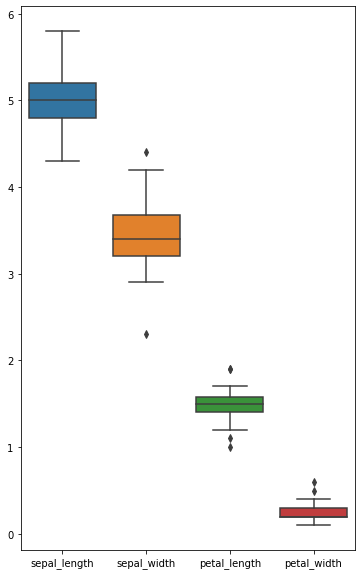

In [ ]:
plt.figure(figsize=(6, 10))
sns.boxplot(data = iris[iris.species == 'setosa'])
plt.show()

In [ ]:
# b. 이상치 제거
s = iris[iris.species == 'setosa']['sepal_width']
q1 = s.quantile(0.25) #판다스를 활용함
q3 = np.percentile(s.values, 75)  #넘파이 활용

In [ ]:
iqr = q3 - q1
q1, q3, iqr

(3.2, 3.6750000000000003, 0.4750000000000001)

In [ ]:
lower_limit = q1 - 1.5 *iqr
upper_limit = q3 + 1.5 *iqr
s[s < lower_limit] = np.nan
s[s > upper_limit] = np.nan

In [ ]:
s.isna().sum()

2

In [ ]:
lower_limit, upper_limit

(2.4875, 4.3875)

In [ ]:
s.mean(), s.std()

(3.43125, 0.32034306743094004)

In [ ]:
def get_new_stat(s):
    q1 = s.quantile(0.25)     #판다스 방법
    q3 = np.percentile(s.values, 75) #넘파이 방법
    iqr = q3 - q1
    lower_limit = q1 - 1.5 *iqr
    upper_limit = q3 + 1.5 *iqr
    s[s < lower_limit] = np.nan
    s[s > upper_limit] = np.nan
    return s.mean(), s.std() 

In [ ]:
get_new_stat(iris[iris.species == 'setosa']['sepal_width'])

In [ ]:
# code refactoring 
def get_new_stat(s):
    q1, q3 = s.quantile(0.25), np.percentile(s.values, 75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5 *iqr
    upper_limit = q3 + 1.5 *iqr
    s[(s < lower_limit) | (s > upper_limit)] = np.nan
    return s.isna().sum(), s.mean(), s.std()

12가지 항목

In [ ]:
# for setosa, ver, vir #종류
#     for s.l, s.w ,p.l, p.w #컬럼
for species in iris.species.unique():
    for feature in iris.columns[:-1]:
        s = iris[iris.species == species][feature]
        _, new_mean, new_std = get_new_stat(s)
        print(species,  feature,":", new_mean, new_std)

In [ ]:
# 결과를 데이터 프레임으로 변경
line = []
for species in iris.species.unique():
    for feature in iris.columns[:-1]:
        s = iris[iris.species == species][feature]
        outlier, new_mean, new_std = get_new_stat(s)
        d = {'species':species, 'feature':feature,
             'outlier갯수':outlier, 'mean':new_mean, 'std':new_std}
        line.append(d)
df = pd.DataFrame(line)
df

In [ ]:
df.set_index(['species', 'feature'], inplace=True)

In [ ]:
df.loc['versicolor']

In [ ]:
#setosa의 sepal_width 데이터 프레임 형태로 
df.loc[[('setosa', 'sepal_width')]]

,,outlier갯수,mean,std
species,feature,,,
setosa,sepal_width,2,3.43125,0.320343


# titanic

In [ ]:
titanic.head()

In [ ]:
# a. category 1열 추가
titanic['category1'] = titanic.apply(lambda x: x.sex if x.age >= 20 else 'child', axis=1)

In [ ]:
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,category1
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True,male
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True,child
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False,child
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True,male
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True,male


In [ ]:
#b.평균나이 대체
titanic.age.fillna(titanic.age.mean(), inplace=True)

In [ ]:
titanic.tail()

In [ ]:
titanic['category1'] = titanic.apply(lambda x: x.sex if x.age >= 20 else 'child', axis=1)

In [ ]:
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,category1
886,0,2,male,27.000000,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True,male
887,1,1,female,19.000000,0,0,30.00,S,First,woman,False,B,Southampton,yes,True,child
888,0,3,female,29.699118,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False,female
889,1,1,male,26.000000,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True,male
890,0,3,male,32.000000,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True,male


In [ ]:
# c. 성별 생존율
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [ ]:
# 선실별 생존율
# titanic.groupby('class')[['survived']].mean()
titanic.pivot_table('survived', 'class')

In [ ]:
# 출발지별 생존율
# titanic.pivot_table('survived', 'embark_town')
titanic.groupby('embark_town')[['survived']].mean()

In [ ]:
# 성별, 선실별 생존율
titanic.pivot_table('survived',  'sex', 'class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [ ]:
bins = [1, 20, 30, 50, 70, 100]
labels = ["미성년자", "청년", "중년", "장년", "노년"]
titanic['age_cate'] = pd.cut(titanic.age, bins, labels=labels)
titanic.tail()

In [ ]:
titanic.age_cate.value_counts()

청년      407
중년      241
미성년자    165
장년       59
노년        5
Name: age_cate, dtype: int64

In [ ]:
titanic.pivot_table('survived',  'age_cate')

,survived
age_cate,
미성년자,0.424242
청년,0.334152
중년,0.423237
장년,0.355932
노년,0.200000


In [ ]:
# e. 세개의 나이그룹
titanic['age_group'] = pd.qcut(titanic.age, 3, labels=['A1', 'A2', 'A3'])
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,category1,age_cate,age_group
886,0,2,male,27.000000,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True,male,청년,A2
887,1,1,female,19.000000,0,0,30.00,S,First,woman,False,B,Southampton,yes,True,child,미성년자,A1
888,0,3,female,29.699118,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False,female,청년,A2
889,1,1,male,26.000000,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True,male,청년,A2
890,0,3,male,32.000000,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True,male,중년,A3


In [ ]:
titanic.age_group.value_counts()

A2    304
A1    301
A3    286
Name: age_group, dtype: int64

In [ ]:
# 그룹별 생존율
titanic.groupby('age_group')[['survived']].mean()

,survived
age_group,
A1,0.411960
A2,0.335526
A3,0.405594


In [ ]:
# 3. Mile per gallon a.
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
mpg['hp_per_cc'] = mpg.horsepower / mpg.displacement
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,hp_per_cc
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,0.423453
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,0.471429
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,0.471698
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,0.493421
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,0.463576


In [ ]:
# b. manufacture와 model 컬럼을 추가

In [ ]:
mpg['manufacture'] = mpg.name.apply(lambda x : x.split()[0])
mpg['model'] = mpg.name.apply(lambda x : " ".join(x.split()[1:]))
mpg.drop(columns=['name'], inplace=True)

In [ ]:
mpg.head()

In [ ]:
mpg['cylinders'].unique()

array([8, 4, 6, 3, 5])

In [ ]:
# c.엔진 실린더 갯수별 연비
mpg.groupby('cylinders')[['mpg']].mean()

In [ ]:
mpg.pivot_table('mpg', 'cylinders')

In [ ]:
# d.생산지별 배기량 대비 마력
mpg.pivot_table('hp_per_cc', 'origin')

In [ ]:
# e.모델이 5개 이상인 제조사중 연비의 평균이 가장 좋은 제조사
mpg.head()

In [ ]:
mpg.manufacture.value_counts()  

In [ ]:
s = mpg.manufacture.value_counts()
s[s >= 5]

In [ ]:
len(s[s >= 5])

In [ ]:
s[s >= 5].index

Index(['ford', 'chevrolet', 'plymouth', 'amc', 'dodge', 'toyota', 'datsun',
       'buick', 'pontiac', 'volkswagen', 'honda', 'mercury', 'mazda',
       'oldsmobile', 'fiat', 'peugeot', 'audi', 'chrysler', 'vw', 'volvo',
       'renault'],
      dtype='object')

In [ ]:
type(s[s >= 5].index)

pandas.core.indexes.base.Index

In [ ]:
big = s[s >= 5].index.tolist()
type(big)
big

In [ ]:
# mpg 데이터에서 big에 속하는 것만 나오도록 필터링
# mpg[조건]
# 조건 = mpg.manufacture.isin(big)
mpg[mpg.manufacture.isin(big)]

In [ ]:
big_mpg = mpg[mpg.manufacture.isin(big)]
big_mpg.pivot_table('mpg', 'manufacture')

In [ ]:
big_mpg.pivot_table('mpg', 'manufacture').sort_values(by='mpg', ascending=False).head()

,mpg
manufacture,
vw,39.016667
honda,33.761538
renault,32.880000
datsun,31.113043
mazda,30.860000


In [ ]:
#참고
new_mpg = mpg.groupby('manufacture').filter(lambda x : x.manufacture.count() >= 5)

In [ ]:
new_mpg.pivot_table('mpg', 'manufacture').sort_values(by='mpg', ascending=False).head()

,mpg
manufacture,
vw,39.016667
honda,33.761538
renault,32.880000
datsun,31.113043
mazda,30.860000
